# Importing Dependencies


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Reading the data


In [140]:
df = pd.read_csv("dataFiles/HINDUNILVR_cleaned.csv", parse_dates=['Date'], index_col='Date')
# df = df.tail(7000)
df = df.sort_index()

# df = df[['Close','Open','Date']]
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn
Date,,,,,,,,
1996-01-01 00:00:00+05:30,34.845124,35.055203,34.623840,34.623840,11000,0.0,0.0,NaN
1996-01-02 00:00:00+05:30,34.623829,35.125218,34.635034,34.993568,203500,0.0,0.0,0.010622
1996-01-03 00:00:00+05:30,34.993582,34.929157,34.621041,34.786304,58000,0.0,0.0,-0.005941
1996-01-04 00:00:00+05:30,34.733077,34.901139,34.677056,34.789097,111500,0.0,0.0,0.000080
1996-01-05 00:00:00+05:30,34.789098,34.957163,34.452973,34.733078,39500,0.0,0.0,-0.001612


# Plots

<Axes: xlabel='Date', ylabel='Close'>

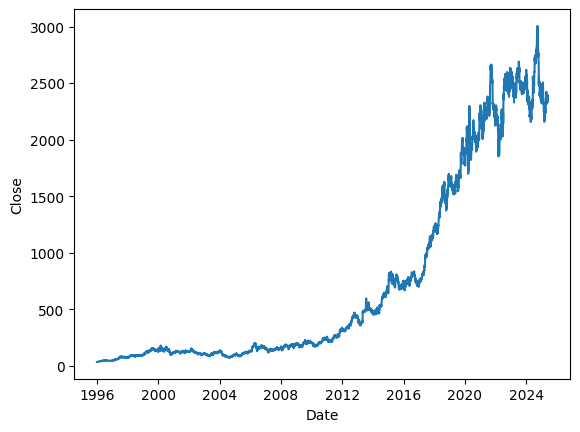

In [141]:
sns.lineplot(data = df, x = "Date", y = "Close")

<Axes: xlabel='Date', ylabel='LogReturn'>

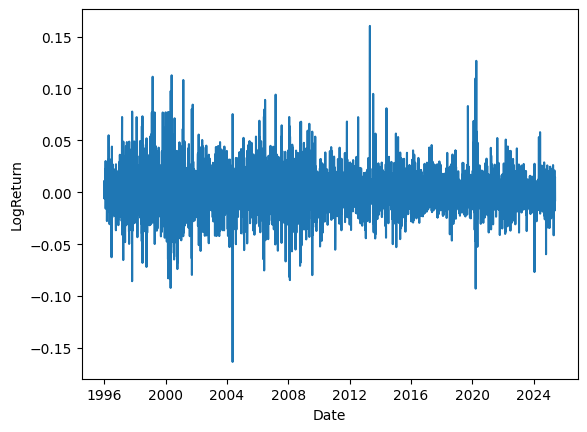

In [142]:
sns.lineplot(data = df, x = "Date", y = "LogReturn")

# ADF Test

In [143]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['LogReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -16.180738454479403
p-value: 4.269117729311195e-29
Used lags: 29
Number of observations: 7353
Critical Values:
   1%: -3.4312396483539924
   5%: -2.8619331560669066
   10%: -2.566979272680667


In [144]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.4229814735021841
p-value: 0.9823343184504993
Used lags: 33
Number of observations: 7350
Critical Values:
   1%: -3.431240011602706
   5%: -2.861933316570829
   10%: -2.566979358119302


# ACF and PACF plots

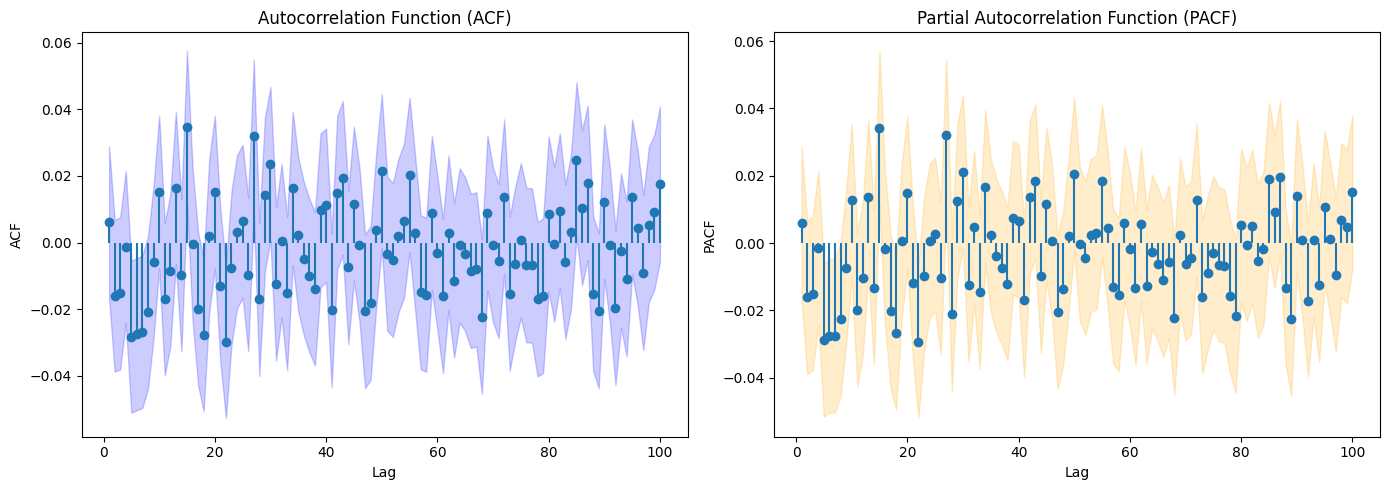

In [145]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Series without NaNs
series = df['LogReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


# GARCH Model

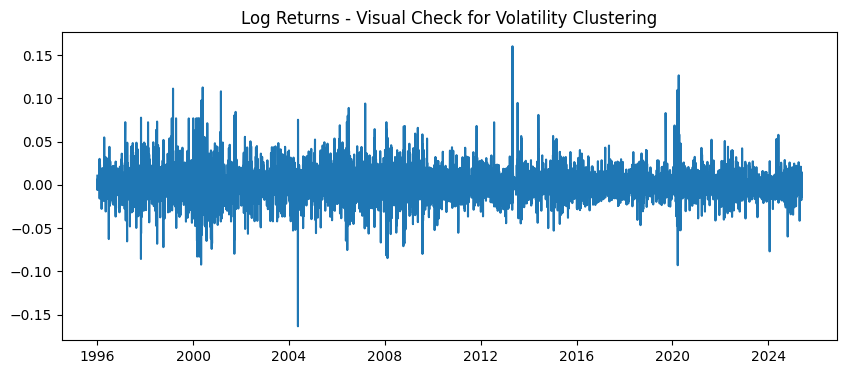

ARCH LM test p-value: 7.946235839902061e-114


/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003241. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignor

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Drop NaNs
log_ret = df['LogReturn'].dropna()

# --- Visual inspection of volatility clustering ---
plt.figure(figsize=(10,4))
plt.plot(log_ret)
plt.title('Log Returns - Visual Check for Volatility Clustering')
plt.show()

# --- ARCH LM test ---
arch_test = het_arch(log_ret.dropna())
print("ARCH LM test p-value:", arch_test[1])

# --- Fit GARCH(p, q) model ---
garch_model = arch_model(log_ret, vol='GARCH', p=3, q=3)
garch_res = garch_model.fit(disp='off')
df['volatility'] = garch_res.conditional_volatility
df['standardized_ret'] = log_ret / df['volatility']

# --- Fit ARMA model on standardized series ---
arma_model = ARIMA(df['standardized_ret'].dropna(), order=(2, 0, 2))  # adjust p, q
arma_res = arma_model.fit()
arma_pred = arma_res.predict(start=df['standardized_ret'].dropna().index[0], end=df['standardized_ret'].dropna().index[-1])

# --- Reconstruct returns and closing price ---
recon_ret = arma_pred * df.loc[arma_pred.index, 'volatility']
recon_log_close = np.log(df['Close'].iloc[0]) + recon_ret.cumsum()
recon_close = np.exp(recon_log_close)




RMSE: 226.9641
MAE : 156.5379
R²   : 0.9286


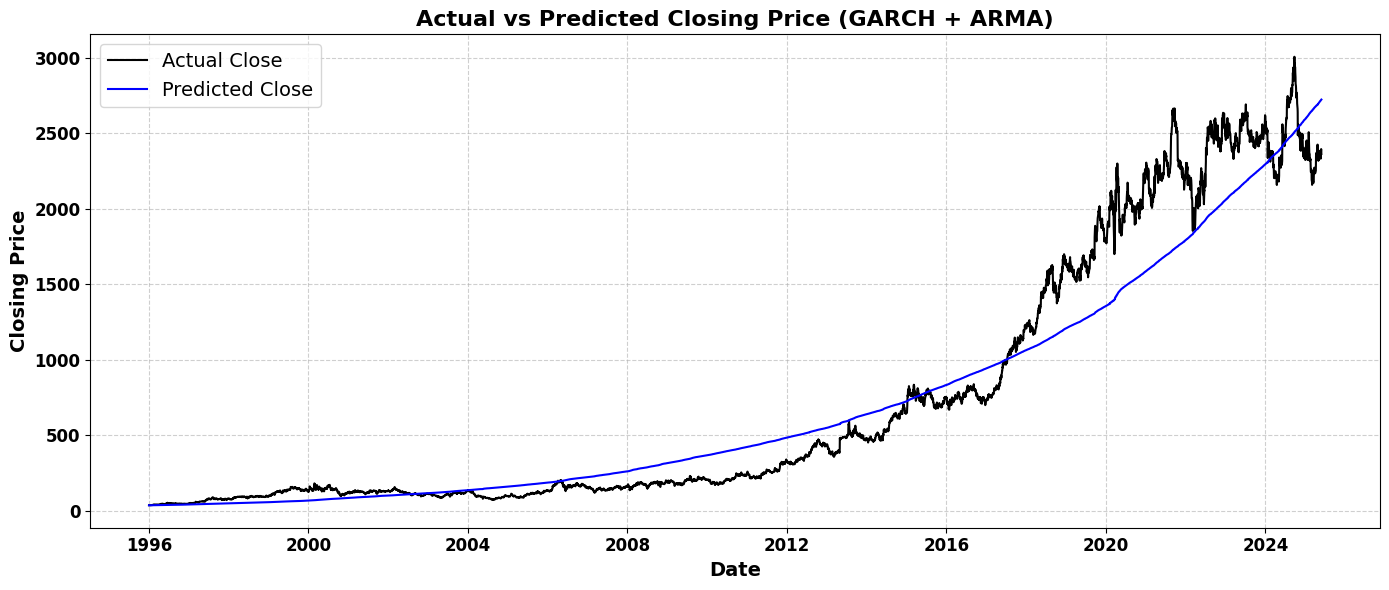

In [150]:
# --- Evaluation ---
true_close = df.loc[recon_close.index, 'Close']
rmse = np.sqrt(mean_squared_error(true_close, recon_close))
mae = mean_absolute_error(true_close, recon_close)
r2 = r2_score(true_close, recon_close)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²   : {r2:.4f}")

# --- Plotting predicted vs actual ---
plt.figure(figsize=(14,6))
plt.plot(true_close, label="Actual Close", color='black')
plt.plot(recon_close, label="Predicted Close",  color ='blue')
plt.title("Actual vs Predicted Closing Price (GARCH + ARMA)",fontsize=16,fontweight='semibold')
plt.xlabel("Date",fontsize=14,fontweight='semibold')
plt.ylabel("Closing Price",fontsize=14,fontweight='semibold')
plt.xticks(fontsize=12,fontweight='semibold')
plt.yticks(fontsize=12,fontweight='semibold')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()